In [1]:
import sys
import os

# add the parent directory ('BNetzA') to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import math

from models import *
from Data_Preprocessing.data_preprocessing import *

pd.set_option('display.float_format', '{:.4f}'.format)

In [2]:
# load Data
path_to_excel = "../data/EVS4_20140118_dataV9.xlsx"
df = load_data(path_to_excel, sheet_name="DatasetV9")

df_train, df_test = prepare_base_data(df)

In [ ]:
df_train_list, df_test_list = create_variations(df_train, df_test)

In [9]:
technical_blocks_variables = [
    "yCables.all.N13.sum", "yCables.all.N57.sum", "yCables.all.tot", "yCables.circuit.N3", "yCables.circuit.N5", "yCables.circuit.N7",
    "yConnections.incl.inj.N1357.sum", "yConnections.other.dso.lower.N1to6.sum", "yConnections.other.dso.same.tot",
    "yEnergy.delivered.net.N23.sum", "yEnergy.delivered.net.N2to4.sum", "yEnergy.delivered.net.N45.sum", "yEnergy.delivered.net.N5to7.sum", "yEnergy.delivered.net.N67.sum", "yEnergy.delivered.net.tot", 
    "yInjection.net.N2to4.sum", "yInjection.net.N5to7.sum", 
    "yInstalledPower.KWKG.other.tot", "yInstalledPower.N1to4.sum", "yInstalledPower.N5to6.sum", "yInstalledPower.N5to7.sum", "yInstalledPower.N7", "yInstalledPower.nonsimcurt.N1to4.sum", "yInstalledPower.nonsimcurt.N5to7.sum", "yInstalledPower.non.solar.wind.tot",
    "yInstalledPower.reducedAPFI.N1to4.sum", "yInstalledPower.reducedAPFI.N5to7.sum", "yInstalledPower.reducedAPFI.tot", "yInstalledPower.renewables.bio.hydro.tot", "yInstalledPower.renewables.solar.tot", "yInstalledPower.renewables.solar.wind.tot", "yInstalledPower.renewables.wind.tot", 
    "yLines.all.N13.sum", "yLines.all.N57.sum", "yLines.all.tot", "yLines.circuit.N3", "yLines.circuit.N5", "yLines.circuit.N7",
    "yMeters.cp.ctrl.tot", "yMeters.house.tot", "yMeters.noncp.ctrl.excl.house.tot", "yMeters.noncp.ctrl.tot", "yMeters.read.tot", 
    "yNet.length.N5", "yNet.length.N7", "yNet.length.all.tot",
    "yPeakload.N4", "yPeakload.N6", "yPeakload.abs.sim.N4", "yPeakload.from.higher.sim.N4", "yPeakload.into.higher.sim.N4", "yPeakload.into.higher.sim.nett.N6"
]


In [60]:
# select only variables from the technical blocks
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train[technical_blocks_variables])

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# add cluster labels to df
df_train['Cluster'] = clusters

df_train["Cluster"].value_counts()

Cluster
 0    109
-1     65
Name: count, dtype: int64

Using the boxplot we can see that the clusters show strong differences based on the variables of the technical block. The clusters can generally be divided into a cluster with more capacity and cost, possibly a larger network (-1 cluster) and a smaller network cluster (0 cluster). -1 generally is considered as noise or outlier in the DBSCAN-Clustering, but in this case due to the large range of values, many providers are actually considered outliers which justifies the cluster.

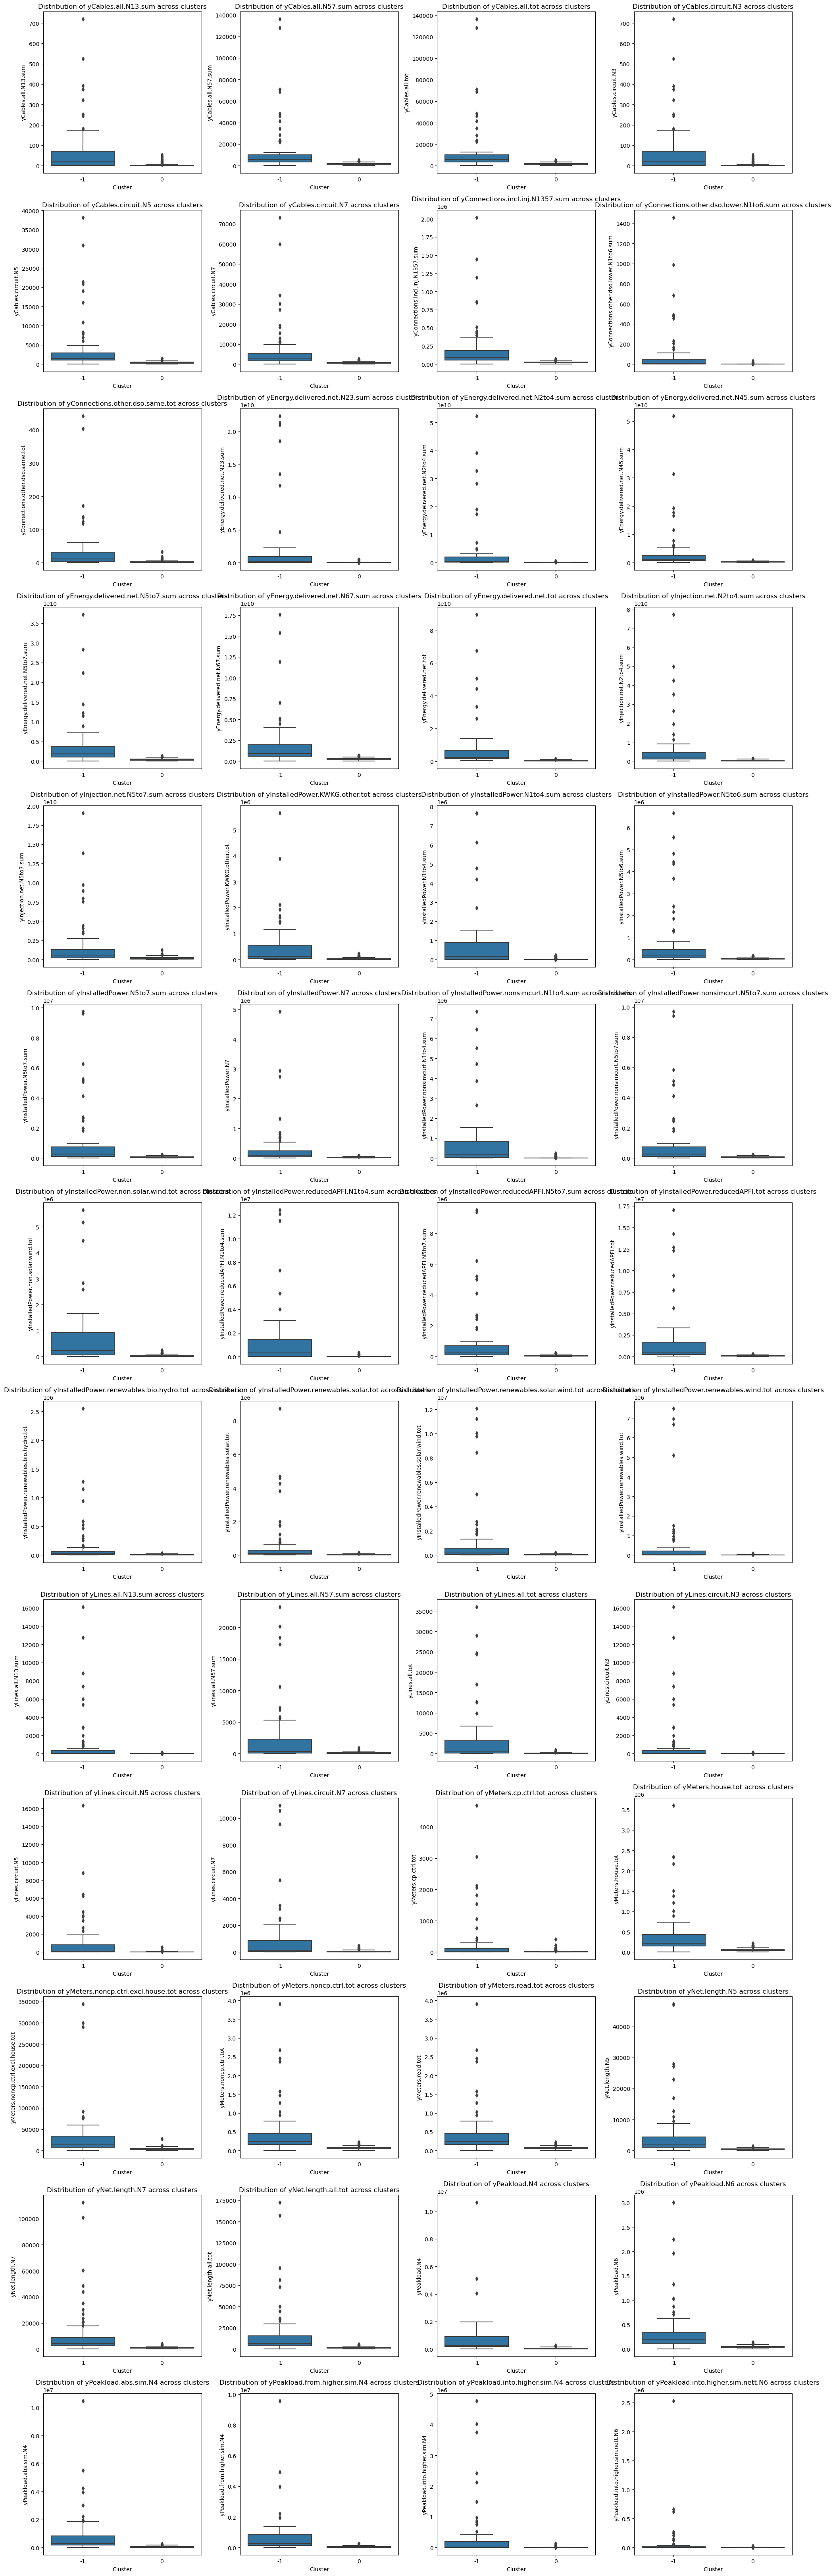

In [45]:
# number of plots per row
plots_per_row = 4

# calculate the number of rows needed
num_vars = len(technical_blocks_variables)
num_rows = math.ceil(num_vars / plots_per_row)

# create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 5, num_rows * 5))

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through variables and create box plots
for i, var in enumerate(technical_blocks_variables):
    sns.boxplot(x='Cluster', y=var, data=df_train, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} across clusters')

# remove any empty subplots
for i in range(num_vars, num_rows * plots_per_row):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
column = "cTOTEXn"
lasso, lasso_vip = lasso_regression(cluster_0_df, column)
evaluation_metrics("Lasso", lasso, cluster_0_df, cluster_0_test_df, column)

In [ ]:
column = "cTOTEXn"
lasso, lasso_vip = lasso_regression(cluster_1_df, column)
evaluation_metrics("Lasso", lasso, cluster_1_df, cluster_1_test_df, column)

In [38]:
technical_blocks_variables = [
    "yCables.all.N13.sum", "yCables.all.N57.sum", "yCables.all.tot", "yCables.circuit.N3", "yCables.circuit.N5", "yCables.circuit.N7",
    "yConnections.incl.inj.N1357.sum", "yConnections.other.dso.lower.N1to6.sum", "yConnections.other.dso.same.tot",
    "yEnergy.delivered.net.N23.sum", "yEnergy.delivered.net.N2to4.sum", "yEnergy.delivered.net.N45.sum", "yEnergy.delivered.net.N5to7.sum", "yEnergy.delivered.net.N67.sum", "yEnergy.delivered.net.tot", 
    "yInjection.net.N2to4.sum", "yInjection.net.N5to7.sum", 
    "yInstalledPower.KWKG.other.tot", "yInstalledPower.N1to4.sum", "yInstalledPower.N5to6.sum", "yInstalledPower.N5to7.sum", "yInstalledPower.N7", "yInstalledPower.nonsimcurt.N1to4.sum", "yInstalledPower.nonsimcurt.N5to7.sum", "yInstalledPower.non.solar.wind.tot",
    "yInstalledPower.reducedAPFI.N1to4.sum", "yInstalledPower.reducedAPFI.N5to7.sum", "yInstalledPower.reducedAPFI.tot", "yInstalledPower.renewables.bio.hydro.tot", "yInstalledPower.renewables.solar.tot", "yInstalledPower.renewables.solar.wind.tot", "yInstalledPower.renewables.wind.tot", 
    "yLines.all.N13.sum", "yLines.all.N57.sum", "yLines.all.tot", "yLines.circuit.N3", "yLines.circuit.N5", "yLines.circuit.N7",
    "yMeters.cp.ctrl.tot", "yMeters.house.tot", "yMeters.noncp.ctrl.excl.house.tot", "yMeters.noncp.ctrl.tot", "yMeters.read.tot", 
    "yNet.length.N5", "yNet.length.N7", "yNet.length.all.tot",
    "yPeakload.N4", "yPeakload.N6", "yPeakload.abs.sim.N4", "yPeakload.from.higher.sim.N4", "yPeakload.into.higher.sim.N4", "yPeakload.into.higher.sim.nett.N6"
    ]

def create_clusters(df_train):

    # select only variables from the technical blocks
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_train[technical_blocks_variables])

    dbscan = DBSCAN(eps=0.5, min_samples=5)
    train_clusters = dbscan.fit_predict(X_scaled)

    # add cluster labels to train df
    df_train['Cluster'] = train_clusters

    # split the train tf based on the cluster labels
    df_train_c0 = df_train[df_train['Cluster'] == 0].drop(['Cluster'], axis=1)
    df_train_c1 = df_train[df_train['Cluster'] == -1].drop(['Cluster'], axis=1)
    
    return df_train_c0, df_train_c1, dbscan, scaler

def model_predict(model, df_train, df_test, target, outcome_transformation = "None", random_state=42, scaling = False):
    X_train = df_train.drop(columns=[target])
    y_train = df_train[target]
    
    X_test = df_test.drop(columns=[target])
    y_test = df_test[target]
    
    # in case of a model with standardization, standardize train and test set again
    if scaling:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    print("Predicting on the training and test data...")

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # in case of outcome transformation, revert to have original scale of data
    if outcome_transformation == "log":
        y_train_pred = np.exp(y_train_pred)
        y_test_pred = np.exp(y_test_pred)
        y_train = np.exp(y_train)
        y_test = np.exp(y_test)
    
    return y_train, y_train_pred, y_test, y_test_pred

def model_evaluation(y_train, y_train_pred, y_test, y_test_pred, model_name):
    print("Evaluating the model...")
    
    # evaluating on train data
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

    # evaluating on test data
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # collect metrics
    results_dict = {
        "Model": [model_name] * 6,
        "Metric": ["Training RMSE", "Training MAE", "Training MAPE",
                   "Testing RMSE", "Testing MAE", "Testing MAPE"],
        "Value": [f"{train_rmse:.2f}", f"{train_mae:.2f}", f"{train_mape:.2f}",
                  f"{test_rmse:.2f}", f"{test_mae:.2f}", f"{test_mape:.2f}"]
    }

    results_df = pd.DataFrame(results_dict)
    return results_df
    

def cluster_based_modeling(df_train, df_test, target, random_state = 42, outcome_transformation = "None"):
    df_train_c0, df_train_c1, dbscan, scaler = create_clusters(df_train)
    
    # scale the test data using the scaler fitted on the training data
    X_test_scaled = scaler.transform(df_test[technical_blocks_variables])

    # apply the DBSCAN model to the test data
    test_clusters = dbscan.fit_predict(X_test_scaled)

    # add cluster labels to test df
    df_test['Cluster'] = test_clusters

    # split the test tf based on the cluster labels
    df_test_c0 = df_test[df_test['Cluster'] == 0].drop(['Cluster'], axis=1)
    df_test_c1 = df_test[df_test['Cluster'] == -1].drop(['Cluster'], axis=1)
    
    # train lasso on both clusters and track evaluation
    lasso_c0, lasso_vip_c0 = lasso_regression(df_train_c0, target)
    eval_metrics_c0 = evaluation_metrics("Lasso", lasso_c0, df_train_c0, df_test_c0, target, scaling = True)

    lasso_c1, lasso_vip_c1 = lasso_regression(df_train_c1, target)
    eval_metrics_c1 = evaluation_metrics("Lasso", lasso_c1, df_train_c1, df_test_c1, target, scaling = True)
    
    # train random forest on both clusters and track evaluation
    rf_c0, rf_vip_c0 = random_forest_regression(df_train_c0, target)
    eval_metrics_c0 = pd.concat([eval_metrics_c0, evaluation_metrics("Random Forest", rf_c0, df_train_c0, df_test_c0, target)], ignore_index=True)

    rf_c1, rf_vip_c1 = random_forest_regression(df_train_c1, target)
    eval_metrics_c1 = pd.concat([eval_metrics_c1, evaluation_metrics("Random Forest", rf_c1, df_train_c1, df_test_c1, target)], ignore_index=True)
    
    
    # add other models here
    
    
    
    # identify the c0 model with the lowest test MAPE
    eval_metrics_c0["Testing MAPE"] = pd.to_numeric(eval_metrics_c0["Testing MAPE"], errors='coerce')
    best_model_df_c0 = eval_metrics_c0.loc[eval_metrics_c0["Testing MAPE"].idxmin()]
    
    # identify the c1 model with the lowest test MAPE
    eval_metrics_c1["Testing MAPE"] = pd.to_numeric(eval_metrics_c1["Testing MAPE"], errors='coerce')
    best_model_df_c1 = eval_metrics_c1.loc[eval_metrics_c1["Testing MAPE"].idxmin()]
    
    # calculate new test metrics across both clusters
    best_model_c0 = best_model_df_c0["Model"]
    if best_model_c0 == "Lasso":
        y_train_c0, y_train_pred_c0, y_test_c0, y_test_pred_c0 = model_predict(lasso_c0, df_train_c0, df_test_c0, target, outcome_transformation, random_state, scaling = True)
    elif best_model_c0 == "Random Forest":
        y_train_c0, y_train_pred_c0, y_test_c0, y_test_pred_c0 = model_predict(rf_c0, df_train_c0, df_test_c0, target, outcome_transformation, random_state, scaling = True)
        
    best_model_c1 = best_model_df_c1["Model"]
    if best_model_c1 == "Lasso":
        y_train_c1, y_train_pred_c1, y_test_c1, y_test_pred_c1 = model_predict(lasso_c1, df_train_c1, df_test_c1, target, outcome_transformation, random_state, scaling = True)
    elif best_model_c1 == "Random Forest":
        y_train_c1, y_train_pred_c1, y_test_c1, y_test_pred_c1 = model_predict(rf_c1, df_train_c1, df_test_c1, target, outcome_transformation, random_state, scaling = True)
    
    # Concatenate all data
    y_train = np.concatenate([y_train_c0, y_train_c1], axis=0)
    y_train_pred = np.concatenate([y_train_pred_c0, y_train_pred_c1], axis=0)
    y_test = np.concatenate([y_test_c0, y_test_c1], axis=0)
    y_test_pred = np.concatenate([y_test_pred_c0, y_test_pred_c1], axis=0)
    
    model_name = f"cluster_{best_model_c0}_{best_model_c1}"
    
    results_df = model_evaluation(y_train, y_train_pred, y_test, y_test_pred, model_name)

    return results_df

path_to_excel = "../data/EVS4_20140118_dataV9.xlsx"
df = load_data(path_to_excel, sheet_name="DatasetV9")

df_train, df_test = prepare_base_data(df)
cluster_based_modeling(df_train, df_test, "cTOTEXn", random_state = 42)


Performing Lasso regression...
Selected features by Lasso (21): Index(['yConnections.N6', 'yMeters.house.N7', 'yCables.circuit.N3',
       'yCables.all.N13.sum', 'yCables.all.tot', 'yNet.length.N3',
       'yTransformers.power.N6', 'yTransformers.power.ront.own.N4',
       'yInstalledPower.KWKG.N7', 'yInstalledPower.other.tot',
       'yInstalledPower.reducedAPFI.N5to7.sum', 'yInjection.KWKG.N7',
       'yEnergy.delivered.to.customers.N7', 'yEnergy.losses.N5',
       'yEnergy.losses.N6', 'yEnergy.delivered.N1357.sum',
       'yEnergy.delivered.net.N67.sum', 'yEnergy.delivered.net.N5to7.sum',
       'yPeakload.N246.max', 'zOther.Population', 'zSoil.BK456'],
      dtype='object')

Variable Importance (Lasso):
                                  Feature  Coefficient
0       yEnergy.delivered.to.customers.N7 2231033.4144
1         yTransformers.power.ront.own.N4 1204068.2351
2         yEnergy.delivered.net.N5to7.sum 1169746.9265
3             yEnergy.delivered.N1357.sum  727101.1051
4       

,Model,Metric,Value
0,cluster_Lasso_Lasso,Training RMSE,1663760.66
1,cluster_Lasso_Lasso,Training MAE,1266692.96
2,cluster_Lasso_Lasso,Training MAPE,0.08
3,cluster_Lasso_Lasso,Testing RMSE,27694307.03
4,cluster_Lasso_Lasso,Testing MAE,12203077.13
5,cluster_Lasso_Lasso,Testing MAPE,0.14


In [ ]:
# collect metrics
    results_dict = {
        "Model": [model_name] * 6,
        "Metric": ["Training RMSE", "Training MAE", "Training MAPE",
                   "Testing RMSE", "Testing MAE", "Testing MAPE"],
        "Value": [f"{train_rmse:.2f}", f"{train_mae:.2f}", f"{train_mape:.2f}",
                  f"{test_rmse:.2f}", f"{test_mae:.2f}", f"{test_mape:.2f}"]
    }

    results_df = pd.DataFrame(results_dict)
    return results_df



def evaluation_metrics(model_name, model, df_train, df_test, target, random_state=42, scaling = False, outcome_transformation = "None"):
    # split data into features and target
    X_train = df_train.drop(columns=[target])
    y_train = df_train[target]
    
    X_test = df_test.drop(columns=[target])
    y_test = df_test[target]
    
    # in case of a model with standardization, standardize train and test set again
    if scaling:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    print("Predicting on the training and test data...")

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # in case of outcome transformation, revert to have original scale of data
    if outcome_transformation == "log":
        y_train_pred = np.exp(y_train_pred)
        y_test_pred = np.exp(y_test_pred)
        y_train = np.exp(y_train)
        y_test = np.exp(y_test)
        
    print("Evaluating the model...")
    
    # evaluating on train data
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

    # evaluating on test data
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # collect metrics
    results_dict = {
        "Model": [model_name] * 6,
        "Metric": ["Training RMSE", "Training MAE", "Training MAPE",
                   "Testing RMSE", "Testing MAE", "Testing MAPE"],
        "Value": [f"{train_rmse:.2f}", f"{train_mae:.2f}", f"{train_mape:.2f}",
                  f"{test_rmse:.2f}", f"{test_mae:.2f}", f"{test_mape:.2f}"]
    }

    results_df = pd.DataFrame(results_dict)
    return results_df

# Evaluation

In [ ]:
# Scale the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(test_df[technical_blocks_variables])

# Apply the DBSCAN model to the test data
test_clusters = dbscan.fit_predict(X_test_scaled)

# Add the cluster labels to your test DataFrame
test_df['Cluster'] = test_clusters

# Split the test DataFrame based on the cluster labels
cluster_0_test_df = test_df[test_df['Cluster'] == 0].drop(['Cluster'], axis=1)
cluster_1_test_df = test_df[test_df['Cluster'] == -1].drop(['Cluster'], axis=1)

# Optionally, you can check the distribution of clusters in the test set
print(test_df['Cluster'].value_counts())